In [1]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
from utils import moving_average, parse_args

In [6]:
# number of iterations to plot
n_iterations = 15000
plotdir = '../plots'
dataset = 'pose'

exp_str = 'cls_10.mbs_15.k_shot_1.inner_numstep_1.meta_lr_0.001.inner_updatelr_0.01.learn_inner_update_lr_False.dataset_pose.mutual_exclusive_False'
# Plot the graphs
csv_file = '../logs/{}.csv'.format(exp_str)

legends = ['training post-optimization mse (raw)',
           'training post-optimization mse (avg)',
            'validation post-optimization mse (raw)',
            'validation post-optimization mse (avg)']

# plot filename
os.system('mkdir -p {}'.format(plotdir))
plot_fname = os.path.join(plotdir, '{}_comparision_plot.png'.format(exp_str))

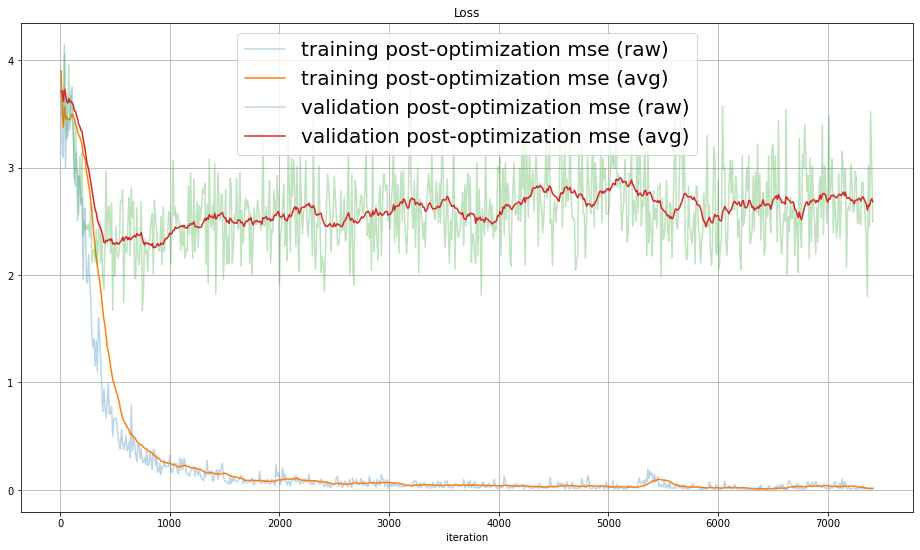

In [7]:
# plot graph
plt.figure(figsize=(16,9))

iteration = [] 
task_train_metric_pre_optim, task_train_metric_post_optim, task_test_metric_pre_optim, task_test_metric_post_optim = [], [], [], []

# plot
metric = None
with open(csv_file) as file:
    reader = csv.DictReader( file )
    for line in reader:
        if int(line['iter']) > n_iterations:
            break
        iteration.append(int(line['iter']))
        if dataset == 'omniglot':
            task_train_metric_pre_optim.append(float(line['task_train_acc_pre_optim']))
            task_test_metric_pre_optim.append(float(line['task_test_acc_pre_optim']))
            task_train_metric_post_optim.append(float(line['task_train_acc_post_optim']))
            task_test_metric_post_optim.append(float(line['task_test_acc_post_optim']))
        else:
            task_train_metric_pre_optim.append(float(line['task_train_loss_pre_optim']))
            task_test_metric_pre_optim.append(float(line['task_test_loss_pre_optim']))
            task_train_metric_post_optim.append(float(line['task_train_loss_post_optim']))
            task_test_metric_post_optim.append(float(line['task_test_loss_post_optim']))

    if dataset == 'omniglot':
        metric = 'Accuracy'
        # compute moving average
        task_train_metric_pre_optim_avg = moving_average(task_train_metric_pre_optim, 20)
        task_test_metric_pre_optim_avg = moving_average(task_test_metric_pre_optim, 20)
        task_train_metric_post_optim_avg = moving_average(task_train_metric_post_optim, 20)
        task_test_metric_post_optim_avg = moving_average(task_test_metric_post_optim, 20)
    else:
        metric = 'Loss'
        # compute moving average
        task_train_metric_pre_optim_avg = moving_average(task_train_metric_pre_optim, 20)
        task_test_metric_pre_optim_avg = moving_average(task_test_metric_pre_optim, 20)
        task_train_metric_post_optim_avg = moving_average(task_train_metric_post_optim, 20)
        task_test_metric_post_optim_avg = moving_average(task_test_metric_post_optim, 20)

# plot graphs    
plt.subplot(1,1,1)
if dataset == 'omniglot':
    plt.ylim(0, 1)
plt.title('{}'.format(metric))
plt.grid()
plt.xlabel('iteration')
plt.plot(iteration, task_train_metric_post_optim, alpha=0.3)
plt.plot(iteration, task_train_metric_post_optim_avg)
plt.plot(iteration, task_test_metric_post_optim, alpha=0.3)
plt.plot(iteration, task_test_metric_post_optim_avg)
plt.legend(legends, fontsize=20)

# save plot to file
plt.savefig(plot_fname)
plt.show()
plt.close()